# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

In [2]:
run smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 1.0000; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'right')
Agent followed the waypoint forward. (rewarded 2.31)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.11)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.55)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.71)
84% of time remaining to reach destination.

/


/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.49)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 1.85)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded -0.11)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 0.72)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.91)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 0.29)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 1.63)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.03)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forw

Agent previous state: ('left', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.56)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent attempted driving left through a red light. (rewarded -9.57)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent drove right instead of left. (rewarded 0.08)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.26)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly 


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.24)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.51)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving left through a red light. (rewarded -9.55)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.56)
77% of time remaining to reach destination.

/-------------------
| Step 7 Res

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.45)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.26)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove right instead of left. (rewarded 1.02)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.03)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent attempted driving ri


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove right instead of forward. (rewarded 1.54)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.95)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.17)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.13)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')


Agent previous state: ('forward', 'green', 'forward', None)
Agent drove right instead of forward. (rewarded 0.29)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.63)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.69)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.97)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 12
\-------------------------

Simulating trial. . . 
epsilon = 0.8025; alph

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.41)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.75)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent drove forward instead of right. (rewarded 0.43)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 1.42)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'right')
Agent attempted driving left through a red light. (


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.99)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.88)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.54)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove right instead of forward. (rewarded 1.54)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, 

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -9.54)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.87)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.78)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.83)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agent idled at a green light with no o


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.10)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.98)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.04)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right')
Agent followed the waypoint forward. (rewarded 0.98)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forw


Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded 0.64)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left')
Agent drove forward instead of right. (rewarded 0.40)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.14)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'forward')
Agent drove forward instead of right. (rewarded 1.31)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded -0.


/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.30)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 22
\-------------------------

Simulating trial. . . 
epsilon = 0.6570; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.64)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.53)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followe

Agent previous state: ('right', 'red', 'right', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.53)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded -0.36)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 0.86)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 24
\-------------------------

Simulating trial. . . 
epsilon = 0.6313; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.79)
95% of t

Agent followed the waypoint forward. (rewarded 1.84)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 26
\-------------------------

Simulating trial. . . 
epsilon = 0.6065; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.45)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light. (rewarded -10.34)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 2.52)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

A

Agent previous state: ('forward', 'red', 'right', 'left')
Agent drove right instead of forward. (rewarded 0.06)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.15)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove right instead of left. (rewarded 1.69)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent drove left instead of forward. (rewarded 0.07)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.73)
35% of time remaining to reach desti


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.50)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.11)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.53)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 0.55)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.57)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent attempted driving left through a red light. (rewarded -10.82)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.02)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.10)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.08)
40% of time remaining to rea


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 0.88)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.70)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.44)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.98)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent attempted driving right t


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.00)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.58)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.18)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.02)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent attempted driving forwa


Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 37
\-------------------------

Simulating trial. . . 
epsilon = 0.4868; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.44)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.97)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 0.70)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.68)
80% of time remaining


/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded 0.12)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 0.78)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 0.01)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 1.38)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 39
\-------------------------

Simulating


/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.41)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded -0.20)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.32)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 0.73)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous stat


Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.10)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.46)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded -0.15)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.12)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent followed the waypoint right. (rewarded 1.12)
30% of time remaining to reach destina

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.59)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.89)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.49)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.29)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded -0.20)
30


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -10.66)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 0.40)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded 0.21)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -10.35)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left')
Agen


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.78)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 0.42)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.61)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right')
Agent drove right instead of forward. (rewarded 1.04)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 51
\-------------------------

Simulating trial. . . 
epsilon = 0.3679; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 2.59)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'left')
Agent followed the waypoint right. (rewarded 2.34)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.97)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded 


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.29)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.47)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded -0.11)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.77)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed th


/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 2.08)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent drove right instead of forward. (rewarded 0.12)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 0.96)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent drove right instead of left. (rewarded -0.31)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent properly idled at a red li

Agent previous state: ('forward', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.55)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.69)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent drove right instead of forward. (rewarded 1.46)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 0.13)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent fo


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.30)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 0.89)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 0.53)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.05)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state

Agent previous state: ('right', 'green', 'left', 'left')
Agent drove left instead of right. (rewarded 0.20)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 1.80)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 0.72)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent followed the waypoint right. (rewarded 1.08)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.11)
75% of time remaining to reach destination.



/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.46)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 1.33)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded -0.23)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.24)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint for


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.94)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove right instead of left. (rewarded 0.89)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.26)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.41)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('r

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.72)
46% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent drove right instead of forward. (rewarded 0.12)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.63)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.50)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.80)
34% of time remaining 

Agent previous state: ('right', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.29)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent followed the waypoint right. (rewarded 1.34)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.75)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 0.16)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent drove right instead of left. (rewarded 0.79)
77% of time remaining to reach destination.

/

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.57)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove forward instead of right. (rewarded 0.01)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded -0.04)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded -0.16)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agen

Agent followed the waypoint forward. (rewarded 1.78)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent drove forward instead of right. (rewarded -0.17)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.77)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove forward instead of right. (rewarded 1.63)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent followed the waypoint right. (rewarded 2.41)
30% of time remaining to reach destination.

/-------------------
|

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.11)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent drove right instead of forward. (rewarded 1.23)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.59)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.42)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent drove right instead of left. (rewarded 1.71)
80% of time remaining to reach destination


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 0.44)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.45)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent followed the waypoint right. (rewarded 1.38)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.81)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoi

Agent followed the waypoint right. (rewarded 1.91)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove forward instead of right. (rewarded 0.44)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 1.44)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.29)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent drove right instead of forward. (rewarded 0.13)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\---


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.57)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.92)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.09)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.61)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of

Agent previous state: ('right', 'green', None, 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -5.72)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.62)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.74)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.07)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.40)
72% of time remaining to r


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 0.11)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.73)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.60)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.58)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agen

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.52)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.39)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.51)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 2.44)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.49)
75% of time remaining to reach destin

| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent attempted driving forward through a red light. (rewarded -9.25)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.79)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.12)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.07)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint l

Agent previous state: ('right', 'green', 'right', None)
Agent followed the waypoint right. (rewarded 2.21)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.37)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.41)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.18)
20% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 93
\-------------------------

Simulating trial. . . 
epsilon = 0.1588; alpha = 0.5000

/-------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.56)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'forward')
Agent drove forward instead of left. (rewarded 1.38)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.80)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent drove right instead of left. (rewarded 0.45)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 0.85)
47% of time remaining to reach 

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.60)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 96
\-------------------------

Simulating trial. . . 
epsilon = 0.1496; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.10)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.20)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.34)
88% of time remaining to reach destination.

/-------------------
| Step 3 Re

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.54)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove right instead of left. (rewarded 0.45)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.05)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.21)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.30)
15% of time remaining to reach dest


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent drove forward instead of left. (rewarded 1.16)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.49)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.46)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 0.18)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint righ

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 2.69)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.30)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.53)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.40)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.74)
80% of time remaining to reach destination.




/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.99)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent drove forward instead of right. (rewarded 0.55)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.63)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.45)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoin


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.45)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent drove right instead of forward. (rewarded 0.89)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 0.88)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 0.76)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent attempted driving forward thro

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.75)
44% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 111
\-------------------------

Simulating trial. . . 
epsilon = 0.1108; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.04)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.49)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.74)
90% of time remaining to reach destin

\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 1.04)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 1.25)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.27)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent followed the waypoint left. (rewarded 2.40)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.32)
40% of time 

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.45)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 0.93)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.37)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.08)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent drove right instead of forward. (rewarded 0.17)
40% of time remaining to reach


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.40)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.21)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.04)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.49)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward 

Agent drove left instead of forward. (rewarded 1.44)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.33)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.60)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.14)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.05)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\--------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 0.95)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 1.38)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'right')
Agent followed the waypoint right. (rewarded 2.41)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.26)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 123
\-------------------------

Simulating trial. . . 
epsilon = 0.0872; alpha = 0.5000

/-------------------
| Step


/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 0.22)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 1.76)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.08)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent drove right instead of left. (rewarded 0.25)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'right')
Agent drove forward instead o

Agent previous state: ('right', 'red', 'left', 'right')
Agent followed the waypoint right. (rewarded 2.46)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 0.38)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent followed the waypoint right. (rewarded 2.86)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.98)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (r

Agent previous state: ('left', 'green', 'left', 'left')
Agent followed the waypoint left. (rewarded 2.00)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.57)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.85)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.09)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.51)
76% of time remaining to reach destinat


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 132
\-------------------------

Simulating trial. . . 
epsilon = 0.0728; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 0.08)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.44)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.61)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving left through a red light. (rewarded -9.96)
8

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.13)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.12)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'right')
Agent drove right instead of forward. (rewarded 1.67)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.05)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.62)
63% of time remaining to reach destinatio


Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 1.60)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.82)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.70)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.64)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 2.12)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent drove left instead of forward. (rewarded 1.73)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.11)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -4.76)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left')
Agent dro


/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.90)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left')
Agent followed the waypoint forward. (rewarded 0.78)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.07)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 139
\-------------------------

Simulating trial. . . 
epsilon = 0.0633; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.45)
97% of tim

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.69)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.76)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.18)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.70)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 0.98)
77% of time remaining to reach destinati

Agent previous state: ('right', 'green', 'left', None)
Agent drove left instead of right. (rewarded 0.08)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 0.16)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving left through a red light. (rewarded -10.89)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 0.09)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.46)
20% of time remaining to reach de


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.21)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.04)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.30)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 1.03)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left.


Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.38)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 1.00)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None)
Agent drove forward instead of right. (rewarded -0.08)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 1.24)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.58)
35% of time remaining to reach destination.

Agent followed the waypoint right. (rewarded 2.23)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.13)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.16)
75% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 151
\-------------------------

Simulating trial. . . 
epsilon = 0.0498; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.58)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('fo


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent followed the waypoint left. (rewarded 1.54)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.54)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.51)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.43)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint lef

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.87)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 0.71)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.87)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.29)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.52)
5% of time remaining to re

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.86)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.61)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.44)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.51)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent followed the waypoint left. (rewarded 1.93)
65% of time remaining 


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.69)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.75)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.81)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.54)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the way


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.06)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.50)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.64)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.08)
52% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 164
\-------------------------

Simulating trial. . . 


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.56)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.56)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent drove forward instead of left. (rewarded 0.81)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.79)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light


Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 0.95)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 2.58)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.06)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.21)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent followed the waypoint forward. (rewarded 0.94)
50% of time remaining to reach destinat

Agent drove right instead of left. (rewarded 0.87)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.76)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.12)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent drove left instead of forward. (rewarded 0.59)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.24)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\----------------


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 0.22)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 1.18)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.28)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.13)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a r

\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded -0.43)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'right')
Agent properly idled at a red light. (rewarded 0.42)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 180
\-------------------------

Simulating trial. . . 
epsilon = 0.0279; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.83)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.43)
93% of time remaining to reach destination.

/-

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.49)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.91)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.80)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.84)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.55)
76% of time remaining to reach desti


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward')
Agent drove right instead of forward. (rewarded 0.50)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.80)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent drove right instead of left. (rewarded 1.35)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.26)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.24)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.88)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward')
Agent drove forward instead of left. (rewarded -0.00)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.35)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.64)
47% of time remaining to reach dest

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.93)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.01)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.11)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 191
\-------------------------

Simulating trial. . . 
epsilon = 0.0224; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.56)
97% of time remaining to reach destination.

/-------------------
| Step 1


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.48)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.08)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.37)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.87)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent attempted driving l

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.55)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 197
\-------------------------

Simulating trial. . . 
epsilon = 0.0198; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.09)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 2.39)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.77)
85% of time remaining to

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.37)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 200
\-------------------------

Simulating trial. . . 
epsilon = 0.0187; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left')
Agent drove right instead of left. (rewarded 0.89)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.39)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.13)
85% of time remaining to reach destination.

/-------------------
| Step

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 0.99)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 1.50)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right')
Agent drove forward instead of left. (rewarded -0.25)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.82)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.51)
32% of time remaini

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 205
\-------------------------

Simulating trial. . . 
epsilon = 0.0169; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 2.30)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.15)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.27)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded


Simulating trial. . . 
epsilon = 0.0159; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.29)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.73)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.29)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.60)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state:


/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.93)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent drove right instead of left. (rewarded 0.39)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.63)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.87)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.78)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded -0.05)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.60)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent drove right instead of forward. (rewarded 1.79)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.14)
60% of time remaining to reach destina

Agent previous state: ('forward', 'red', 'left', None)
Agent drove right instead of forward. (rewarded 0.35)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.97)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 0.16)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.91)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.91)
76% of time remaining to reach destination.



Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 0.37)
43% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.50)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.34)
37% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.60)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.57)
31% 

Agent previous state: ('right', 'red', 'forward', 'left')
Agent followed the waypoint right. (rewarded 1.21)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.19)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.31)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.27)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.36)
76% of time remaining to reach destinat

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.19)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 1.17)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.29)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.47)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.19)
44% of time remaining to reach destination.

/----

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.93)
55% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 225
\-------------------------

Simulating trial. . . 
epsilon = 0.0113; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.60)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 1.66)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent drove left instead of right. (rewarded 0.60)
88% of time rem


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.57)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.06)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.56)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.69)
25% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 229
\-------------------------

Simulating trial. 


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 1.61)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 233
\-------------------------

Simulating trial. . . 
epsilon = 0.0097; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.47)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.00)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.15)
90% of time remaining 

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove left instead of right. (rewarded -0.17)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 0.62)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward')
Agent drove left instead of right. (rewarded 1.14)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.52)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rew


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None)
Agent drove right instead of left. (rewarded -0.68)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.76)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 238
\-------------------------

Simulating trial. . . 
epsilon = 0.0087; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 1.49)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.13)
92% of time remaining 


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.08)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.30)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.46)
66% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.82)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of le


/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.35)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 1.63)
65% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 244
\-------------------------

Simulating trial. . . 
epsilon = 0.0078; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 1.22)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 1.22)
90% o

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.06)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.02)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.24)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.49)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent drove right instead o


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent drove right instead of forward. (rewarded 1.62)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 2.61)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.66)
65% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 249
\-------------------------

Simulating trial. . . 
epsilon = 0.0070; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.22)
97% of time re


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.03)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent drove right instead of forward. (rewarded 0.71)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.96)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.41)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent drove right instead of forwa

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.17)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.03)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.51)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.03)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.49)
73% of 

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.49)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.52)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 2.16)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.44)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.07)
20% of time remaining to reach destination.


Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.02)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.84)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.62)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.36)
5% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 260
\-------------------------

Simulating trial. . . 
epsilon = 0.0056; alpha = 0.5000

/-------------------
| Step 0 


/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.20)
33% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 262
\-------------------------

Simulating trial. . . 
epsilon = 0.0054; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.29)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.32)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.61)
88% of t

Agent previous state: ('right', 'green', None, 'forward')
Agent drove left instead of right. (rewarded 0.40)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left')
Agent drove forward instead of right. (rewarded 1.82)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.83)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.92)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.71)
60% of time remaining to reach


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.40)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.95)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.81)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.90)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint fo

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.18)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 2.25)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward')
Agent drove right instead of left. (rewarded 0.51)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.49)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'left')
Agent properly idled at a red light. (rewarded -0.41)
25% of time remaining to reach destination.

/-

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.46)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None)
Agent followed the waypoint forward. (rewarded 1.44)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.95)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.85)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 1.50)
64% of time remaining to reach 

Agent previous state: ('forward', 'red', 'right', 'right')
Agent properly idled at a red light. (rewarded 2.78)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.06)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.74)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.77)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.45)
70% of time remaining to rea


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead of left. (rewarded 0.47)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.25)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.59)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent drove right instead of left. (rewarded 1.26)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.57


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 1.60)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.57)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.81)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.49)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward.

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.69)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.58)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 0.73)
36% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 283
\-------------------------

Simulating trial. . . 
epsilon = 0.0036; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the waypoint left. (rewarded 1.83)
95% of time remaining to reach destination.

/-------------------
| Step 1 


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 0.69)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None)
Agent followed the waypoint right. (rewarded 2.36)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.80)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 1.94)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (re

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.11)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.88)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.03)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.84)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 0.91)
36% of time remaining 

92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.20)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.09)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.74)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.70)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.57)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.13)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent drove left instead of forward. (rewarded 0.51)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'forward')
Agent followed the waypoint right. (rewarded 2.25)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light.


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.16)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.30)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.61)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.50)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint r

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.73)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.49)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 2.08)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.58)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.37)
45% of time remaining to reach destination.

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 0.52)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.21)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.20)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.33)
4% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 305
\-------------------------

Simulating trial. . . 
epsilon = 0.0023; alpha = 0.5000

/----------


/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.05)
12% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 307
\-------------------------

Simulating trial. . . 
epsilon = 0.0022; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'left')
Agent drove forward instead of right. (rewarded 1.91)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None)
Agent followed the waypoint right. (rewarded 2.39)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'right')
Agent drove right instead of forward. (rewarded 1.43)
85


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.37)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.26)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 1.62)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 1.02)
72% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 311
\-------------------------

Simulating trial. . . 
eps

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', 'left')
Agent properly idled at a red light. (rewarded 2.43)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None)
Agent properly idled at a red light. (rewarded 1.72)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.77)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 0.88)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward')
Agent followed the wa


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.52)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None)
Agent followed the waypoint forward. (rewarded 2.13)
63% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 317
\-------------------------

Simulating trial. . . 
epsilon = 0.0018; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left')
Agent followed the waypoint right. (rewarded 1.73)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent followed the waypoint right. (rewarded 2.91)
92% of time rem


/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.62)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.08)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 321
\-------------------------

Simulating trial. . . 
epsilon = 0.0017; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.50)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 2.90

Agent properly idled at a red light. (rewarded 1.95)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent drove right instead of left. (rewarded 0.36)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.67)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.89)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.20)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\------------


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.01)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 1.46)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.43)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'right')
Agent drove forward instead of left. (rewarded 1.55)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent drove right inste


/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.26)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.22)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 2.05)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None)
Agent followed the waypoint left. (rewarded 2.20)
27% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 330
\-------------------------

Simulating trial. . . 
eps


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.61)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent followed the waypoint forward. (rewarded 2.87)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 1.43)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None)
Agent properly idled at a red light. (rewarded 2.20)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None)
Agent drove forward instead 

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.01)
63% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 336
\-------------------------

Simulating trial. . . 
epsilon = 0.0012; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.95)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.11)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.56)
88% of time remainin


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right')
Agent properly idled at a red light. (rewarded 1.45)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.57)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.47)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None)
Agent properly idled at a red light. (rewarded 1.07)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward')
Agent properly idled at a re

Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 0.97)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent properly idled at a red light. (rewarded 0.76)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 0.84)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None)
Agent followed the waypoint right. (rewarded 0.56)
25% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 343
\-------------------------

Simulating trial. . . 
epsilon = 0.0011; alpha = 0.5000

/-------------------
|

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.81)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.87)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'right')
Agent drove right instead of left. (rewarded 0.55)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 346
\-------------------------

Simulating trial. . . 
epsilon = 0.0010; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'right')
Agent followed the waypoint right. (rewarded 1.40)
96% of time remaini


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None)
Agent drove left instead of forward. (rewarded 1.55)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'right')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.63)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right')
Agent drove forward instead of right. (rewarded 1.68)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent followed the waypoint right. (rewarded 2.53)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', No

Agent previous state: ('forward', 'green', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 1.57)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left')
Agent drove right instead of left. (rewarded 0.48)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 1.87)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove forward instead of left. (rewarded 1.57)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 2.76)
64% of time remaining to reach destinati


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, None)
Agent drove right instead of forward. (rewarded 0.92)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.54)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.05)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.44)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', 'le

Agent previous state: ('right', 'green', None, 'right')
Agent followed the waypoint right. (rewarded 1.28)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None)
Agent attempted driving forward through a red light. (rewarded -9.55)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right')
Agent followed the waypoint right. (rewarded 2.04)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left')
Agent drove right instead of forward. (rewarded 0.49)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', None, None)
Agent drove right instead of left. (rewarded 1.78)
55% of time remaining to reach dest

Agent previous state: ('forward', 'green', None, None)
Agent drove right instead of forward. (rewarded 1.99)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left')
Agent followed the waypoint left. (rewarded 2.89)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', None, None)
Agent drove left instead of right. (rewarded 0.23)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent properly idled at a red light. (rewarded 0.48)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.05)
75% of

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
1. The Smartcab doesn't move at all during the simulation
2. In general, the agent will receive positive reward when its action is appropriate, while, will receive negative reward when its action is inappropriate. As the agent's state is not updated, which means the agent doesn't move in the simulation, there are only two scenario observed: first, agent idled at a red line, and second, agent idled at a green light with no coming traffic. The former one is the appropriate action thus deserving a positive reward, while, the latter one is not the appropriate action thus is given a negative reward
3. The switch of light color is independent to the rewards. It seems that the light color will be switched after several steps

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
1. In agent.py file, there are three flags: update_delay, tolerance, n_test. The update_delay controls the time gap between two consecutive actions. The tolerance controls one of the entry criteria for testing. The testing will start when the training error eplison is smaller than the tolerance. Thus the higher the value of the tolerance is, the more likely it is to start the testing. The n_test controls the number of testing trails we want to run. When the running times of testing trail is larger than n_test, the testing will be stopped.
2. The function act in the environment.py is called when an agent performs an action
3. The render_text() function is the non-GUI display for each trail. It displays the action the agent takes and the updated status in the text form. The render() function, on the leverage of pygame, is the GUI display function, visualizing the action the agent takes and the updated status in the form of images
4. East-West direction is considered first

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


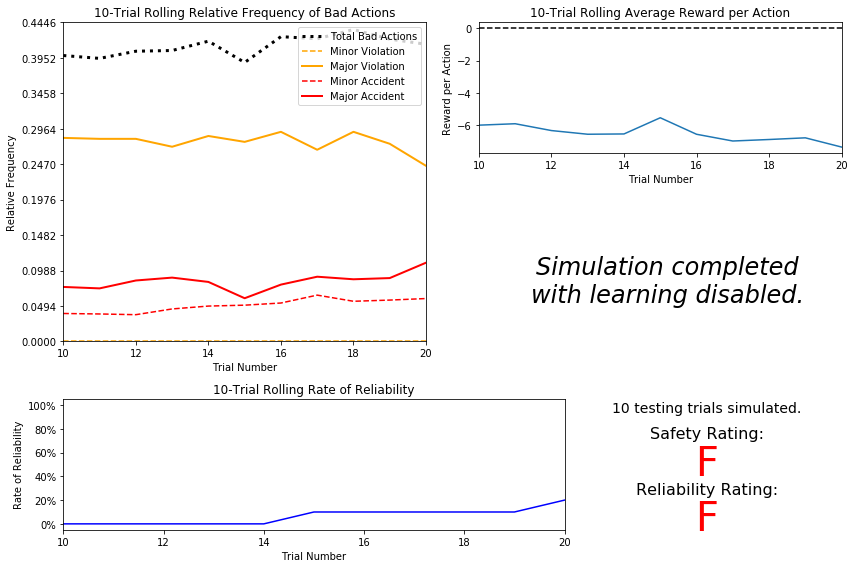

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
In the 10 testing trails, more than 40% of actions that the agent makes are bad decisions, among which almost one fourth, equivalently about 10% of total actions, cause accidents. The high percentage of bad decisions as well as accidents means the agent cannot satisfy the requirement in terms of safety;
In terms of reliability, the rolling rates for the 10 testing trails are all below 20%. The rather low level of rolling rate indicates the agent cannot satisfy the requirement in terms of reliability;
As for the average reward per action, it is always below -4, which is consistent with its rather high percentage of bad decisions and rather low reliability;
As teh number of trails increases, the percentage of bad decisions increase slightly to 45%. It means the level of safety does not improve as the number of trails increases. Moreover, the rolling rate of reliability decrease to almost zero as the number of trails increases. It indicates that most of time the agent fails to reach the destination. For the reward, it has no significant changes as the number of trails increases. In a word, the increase of trails number does not lead to any improvement in terms of safety or reliability. This Smartcab cannot be regarded as safe or reliable for its passengers.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
1. The features waypoints, light, left, oncoming are most relevant for learning both safety and efficiency. The waypoints represent the direction the agent should drive leading to the destination and only by selecting the appropriate direction can the agent arrive the destination. The features light, right, oncoming are relevant for learning safety. The feature light, the color of the light, determines whether the agent should go or idle. The feature oncoming, representing whether there is other dummy agent coming straight through the interaction, matters when the agent is going to turn right as the light is green. The feature left, representing whether there is another dummy agent approaching from the left to the right of the agent, matters when the agent is going to turn right as the light is red. Only by following all these traffic rules can the agent be safe.
2. The feature right, representing whether there is another dummy agent travelling to the agent's left, does not matter no matter the light is red or green. Thus this feature is not relevant for the agent to learn safety and efficiency. The feature deadline, an indicator as how many time is left for the agent reaches the destination, is not necessary to be put in the state space. The simulation will automatically stop when the time is out and be regarded as failure for that trail. It has no contribution to the decision making of the agent on each step within the trail.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
The size of the state space is 96. Given the number of trails, i think the size of state space is too large

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

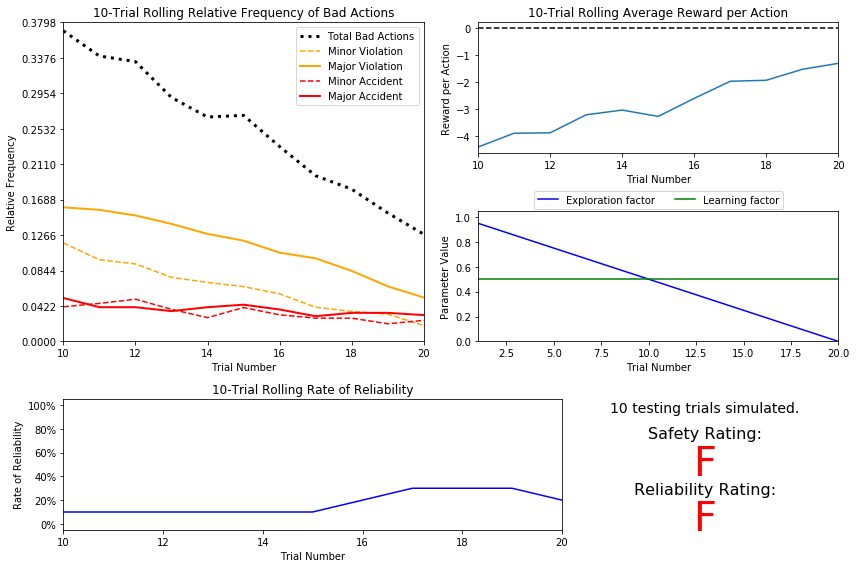

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
1. The observations with trail number less than 10 are rather similar as the basic drivin agent, as the percentage of total bad actions is high to 38% and rate of reliability is low to around 10%. It indicates that the number of trails is too small to train the agent safely and reliablely
2. Based on the trend of total bad actions, it seems that around 25 training trails can train the agent better, expected to decrease the percentage of total bad actions to below 10%. However, as current rule for the decaying of epsilon limits the total number of trails to 20. It is impossible to reach number of trails larger than 20 without changing the decaying rule of epsilon
3. Yes, the decaying function is linear, decreasing with 0.05 each step. When the number of trails reaches 20, the epsilon becomes zero and the training stops. The figure above clearly shows these features
4. Yes, as the number of training trials increases, the number of bad actions decreases and the average reward increases. All of these indicate that the agent does better and better as the number of training trails increases.
5. Compared to the initial driving agent, the safety increases as the number of total bad actions decrease significantly. However, the rating for safety is still F. The reliability increases sightly with the rating still as F. It indicates that the training is still not enough to make the safety and reliability of the agent satisfy the requirement. Some more improvement on Q learning is necessary.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

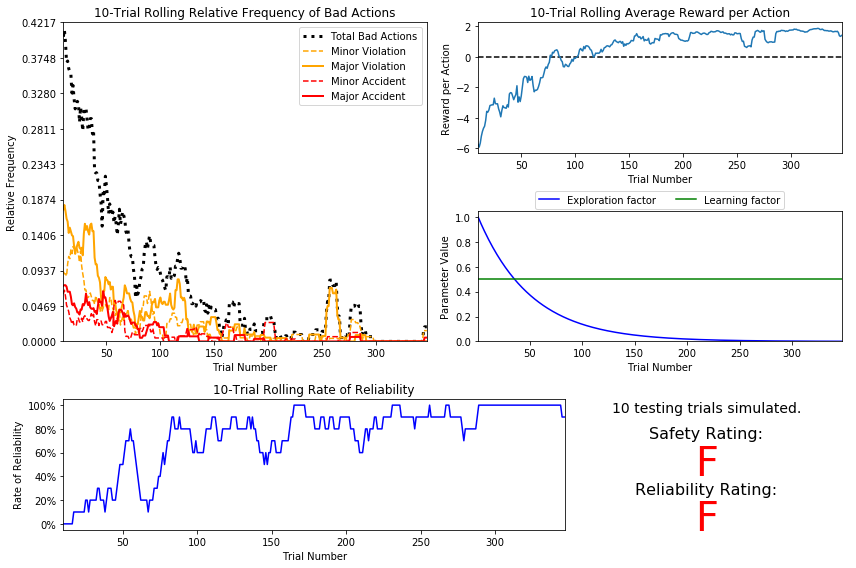

In [3]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.